# 2.2. Квантование изображения

### Проквантовать изображение, сократив число градаций до 4

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('pic/avto.jpg')

Изменяем размер массива изображения, где (–1,3) – задаем число строк и столбцов, в которые помещаем прежний массив. В данном случае 3 – означает в 3 столбца, а –1 это исключение, означает что мы даем python самому понять во сколько строк это можно уместить


In [3]:
Z = img.reshape((-1, 3))

Преобразуем массив к float (числа с плавающей точкой)

In [4]:
Z = np.float32(Z)

Критерии для остановки квантования. Здесь останавливаем квантование, если достигли 10 итераций или если достигли точности в 1.0)

In [5]:
crt=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

Количество градаций изображения

In [6]:
K = 4

Функция квантования

In [7]:
ret,label,center=cv2.kmeans(Z,K,None,crt,10,cv2.KMEANS_RANDOM_CENTERS)

Преобразование матрицы к формату uint8 (от 0 до 255)

In [8]:
center = np.uint8(center)

Сворачиваем массив нескольких матриц в одну

In [9]:
res = center[label.flatten()]
res2 = res.reshape((img.shape))

Выводим изображения на экран

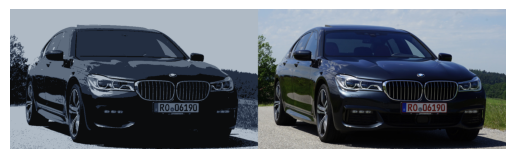

In [10]:
full_res = np.hstack((res2, img))
plt.imshow(full_res[...,::-1])
plt.axis('off');